In [45]:
from RLSwitch import RLSwitchEnv
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
from dqn import DQN
from maxWeight import maxWeight

# DQN Implementation
from collections import deque


In [47]:
# Environment Setup
n = 3 # nxn
end_t = 100
env = RLSwitchEnv(n,end_t, lambdaMatrix = None)

In [48]:
# DQN setup
gamma   = 0.9
epsilon = .95
dqn_agent = DQN(env=env)

In [49]:
gamma   = 0.9
epsilon = .95
trials  = 5
steps = []
for trial in tqdm(range(trials)):
    env.reset() # Reset between each trial
    cur_state = env.state # Get the current state
#     for step in tqdm(range(end_t)): # Till the particular run ends
    for step in range(end_t): # Till the particular run ends
        action = dqn_agent.act(cur_state) # Get the action
#         env.render()
        new_state, reward, done, _ = env.step(action) # Get the rewards
#         print(reward)
        dqn_agent.remember(cur_state, action, 
            reward, new_state, done) # Store the states
        dqn_agent.replay() # Learng
        dqn_agent.target_train() # train target
        cur_state = new_state # set new state
        if done:
            break

In [52]:
dqn_agent.save_model("models/1stdqn")

INFO:tensorflow:Assets written to: models/1stdqn/assets


In [56]:
# Environment
n = 3 # nxn
end_t = 1000 # number of time steps to end an episode after
env = RLSwitchEnv(n,end_t, lambdaMatrix = None)
# test settings

tests = 5
rewardsDQN = np.zeros((tests,end_t))


for i in tqdm(range(0,tests)):
    env.reset()
    for j in range(0,end_t):
        action = dqn_agent.act(env.state)
        observation, reward, done, info = env.step(action)
        rewardsDQN[i][j] = reward
        if done:
            env.reset()


In [41]:
# Environment
n = 3 # nxn
end_t = 1000 # number of time steps to end an episode after
env = RLSwitchEnv(n,end_t, lambdaMatrix = None)
# test settings

tests = 10
rewardsRandom = np.zeros((tests,end_t))


for i in tqdm(range(0,tests)):
    env.reset()
    for j in range(0,end_t):
        action = env.action_space.sample()
        observation, reward, done, info = env.step(action)
        rewardsRandom[i][j] = reward
        if done:
            env.reset()


In [40]:
# maxWeight Environment
n = 3 # nxn
end_t = 1000 # number of time steps to end an episode after
env = RLSwitchEnv(n,end_t, lambdaMatrix = None)
# test settings

tests = 10
rewardsMaxWeight = np.zeros((tests,end_t))

maxWeightAgent = maxWeight(env)

for i in tqdm(range(0,tests)):
    env.reset()
    for j in range(0,end_t):
        action = maxWeightAgent.act()
        observation, reward, done, info = env.step(action)
        rewardsMaxWeight[i][j] = reward
        if done:
            env.reset()


In [31]:
np.average(rewardsMaxWeight,axis=1)

array([-3.51, -4.9 , -3.64, -6.03, -4.12, -4.35, -5.4 , -5.19, -6.16,
       -3.91])

In [58]:
avgRandom = np.average(rewardsRandom,axis=1)
avgDQN = np.average(rewardsDQN,axis=1)
avgmaxWeight = np.average(rewardsMaxWeight,axis=1)

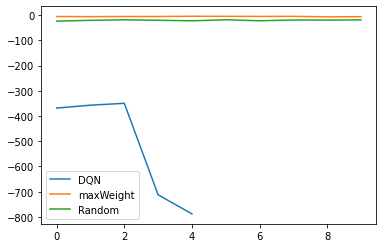

In [59]:
plt.plot(avgDQN)
plt.plot(avgmaxWeight)
plt.plot(avgRandom)
plt.legend(["DQN",'maxWeight','Random'])
plt.show()